<a href="https://colab.research.google.com/github/karam-koujan/dog-vs-cat-classification/blob/main/dog-vs-cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle


In [3]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mlrond","key":"fbae98785636cd498845ad590845bb9b"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/



In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 !kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          28651        804  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2452         70  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4871        100  1.0              
mohithsairamreddy/salary-data 

In [8]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:40<00:00, 22.3MB/s]
100% 812M/812M [00:40<00:00, 20.8MB/s]


In [17]:
!unzip -qq train.zip

In [10]:
import os, shutil, pathlib

In [11]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("dogs_vs_cats-small")


In [18]:
def make_subset(subset_name,start_idx,end_idx):
    for category in ("cat","dog"):
       dir = new_base_dir / subset_name / category
       os.makedirs(dir)
       fnames = [f"{category}.{i}.jpg" for i in range(start_idx,end_idx)]
       for fname in fnames : 
           shutil.copyfile(src=original_dir/fname,dst=dir/fname)
make_subset("train",0,1000)
make_subset("validation",1000,1500)
make_subset("test",1500,2500)

In [19]:
from tensorflow import keras
from tensorflow.keras import layers 

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory 
train_dataset = image_dataset_from_directory(new_base_dir/"train",image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir/"validation",image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir/"test",image_size=(180,180),batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [21]:
for data_batch, label_batch in train_dataset : 
   print("data batch",data_batch.shape)
   print("label batch",label_batch.shape)
   break

data batch (32, 180, 180, 3)
label batch (32,)


In [22]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

In [23]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model = keras.Model(inputs=inputs,outputs=outputs)
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath= "convnet_from_scratch",
        save_best_only=True,
        monitor= "val_loss"
    )
]
history = model.fit(train_dataset,epochs=100,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.5085

63/63 [==============================] - 18s 120ms/step - loss: 0.6955 - accuracy: 0.5085 - val_loss: 0.6907 - val_accuracy: 0.5260
Epoch 2/100
62/63 [============================>.] - ETA: 0s - loss: 0.7140 - accuracy: 0.5534

63/63 [==============================] - 6s 88ms/step - loss: 0.7138 - accuracy: 0.5540 - val_loss: 0.6540 - val_accuracy: 0.5960
Epoch 3/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6527 - accuracy: 0.6200 - val_loss: 0.6602 - val_accuracy: 0.6180
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.6370

63/63 [==============================] - 6s 89ms/step - loss: 0.6718 - accuracy: 0.6370 - val_loss: 0.6430 - val_accuracy: 0.6250
Epoch 5/100
63/63 [==============================] - ETA: 0s - loss: 0.5918 - accuracy: 0.6820

63/63 [==============================] - 6s 84ms/step - loss: 0.5918 - accuracy: 0.6820 - val_loss: 0.6094 - val_accuracy: 0.6430
Epoch 6/100
63/63 [==============================] - 6s 85ms/step - loss: 0.5794 - accuracy: 0.6910 - val_loss: 0.6281 - val_accuracy: 0.6490
Epoch 7/100
62/63 [============================>.] - ETA: 0s - loss: 0.5567 - accuracy: 0.7107

63/63 [==============================] - 6s 83ms/step - loss: 0.5560 - accuracy: 0.7115 - val_loss: 0.5955 - val_accuracy: 0.6760
Epoch 8/100
62/63 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.7359

63/63 [==============================] - 7s 111ms/step - loss: 0.5261 - accuracy: 0.7360 - val_loss: 0.5874 - val_accuracy: 0.6740
Epoch 9/100
63/63 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.7590

63/63 [==============================] - 5s 82ms/step - loss: 0.5015 - accuracy: 0.7590 - val_loss: 0.5474 - val_accuracy: 0.7190
Epoch 10/100
63/63 [==============================] - 4s 65ms/step - loss: 0.4715 - accuracy: 0.7855 - val_loss: 0.5536 - val_accuracy: 0.7340
Epoch 11/100
62/63 [============================>.] - ETA: 0s - loss: 0.4408 - accuracy: 0.7979

63/63 [==============================] - 6s 94ms/step - loss: 0.4430 - accuracy: 0.7970 - val_loss: 0.5291 - val_accuracy: 0.7440
Epoch 12/100
63/63 [==============================] - 4s 66ms/step - loss: 0.4034 - accuracy: 0.8295 - val_loss: 0.5735 - val_accuracy: 0.7500
Epoch 13/100
63/63 [==============================] - 5s 80ms/step - loss: 0.3763 - accuracy: 0.8385 - val_loss: 0.5820 - val_accuracy: 0.7200
Epoch 14/100
63/63 [==============================] - 4s 64ms/step - loss: 0.3211 - accuracy: 0.8675 - val_loss: 0.6290 - val_accuracy: 0.7430
Epoch 15/100
63/63 [==============================] - 4s 63ms/step - loss: 0.2779 - accuracy: 0.8845 - val_loss: 0.7581 - val_accuracy: 0.7520
Epoch 16/100
63/63 [==============================] - 6s 84ms/step - loss: 0.2322 - accuracy: 0.9100 - val_loss: 0.6517 - val_accuracy: 0.7720
Epoch 17/100
63/63 [==============================] - 6s 87ms/step - loss: 0.2195 - accuracy: 0.9115 - val_loss: 0.6723 - val_accuracy: 0.7440
Epoch 18/100

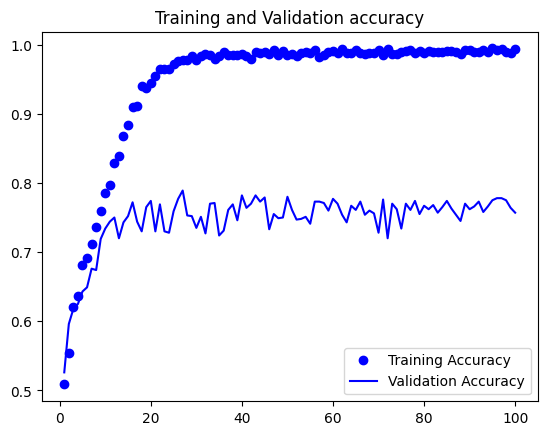

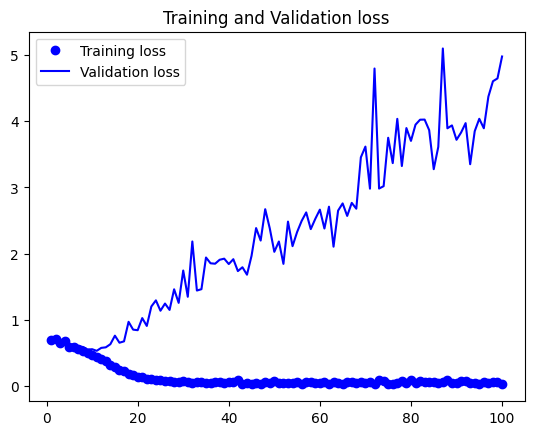

In [24]:
import matplotlib.pyplot as plt 
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,"bo",label="Training Accuracy")
plt.plot(epochs,val_accuracy,"b",label="Validation Accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [25]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss,test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy, {test_acc:.3f}, Test loss {test_loss}")

63/63 [==============================] - 6s 86ms/step - loss: 0.5499 - accuracy: 0.7395
Test accuracy, 0.739, Test loss 0.5499116778373718
